In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

In [2]:
os.chdir('F:\\Data Science Projects\\Credict Card Project')
os.getcwd()

'F:\\Data Science Projects\\Credict Card Project'

In [3]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
data.iloc[: , 0:30] = StandardScaler().fit_transform(data.iloc[: , 0:30])

In [7]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.641931,-6.065842,6.099286,-6.486245,-1.459641,-3.886611,-1.956690,-3.975628,6.116573,1.742559,...,0.290602,0.154146,1.624574,-0.841000,2.756320,0.518500,2.337901,2.495529,-0.350151,0
284803,1.641952,-0.374121,-0.033356,1.342145,-0.521651,0.629040,0.794446,0.019667,0.246886,0.532299,...,0.291625,1.273781,0.019958,-1.677920,-1.163726,-0.819647,0.169641,-0.162164,-0.254117,0
284804,1.641974,0.980024,-0.182434,-2.143205,-0.393984,1.905833,2.275262,-0.239939,0.593140,0.393630,...,0.315913,0.796788,-0.060053,1.056944,0.509797,-0.181182,0.011037,-0.080467,-0.081839,0
284805,1.641974,-0.122755,0.321250,0.463320,0.487192,-0.273836,0.468155,-0.554672,0.568631,0.356887,...,0.361112,1.102451,-0.261503,0.203428,-1.091855,1.133635,0.269604,0.316687,-0.313249,0


In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,-3.065637e-16,-1.506872e-17,-9.580116e-18,-8.622104e-17,-5.189230e-18,3.832046e-17,9.979288e-18,1.237432e-17,-3.193372e-18,7.234983e-19,...,-3.642440e-18,3.193372e-18,8.781773e-18,9.580116e-18,-5.029561e-17,5.887780e-18,2.444925e-18,-7.908585e-18,2.913952e-17,0.001727
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,0.041527
min,-1.996583e+00,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01,0.000000
25%,-8.552120e-01,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01,0.000000
50%,-2.131453e-01,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01,0.000000
75%,9.372174e-01,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02,0.000000
max,1.642058e+00,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train , test =  train_test_split(data , test_size = 0.3 , random_state = 123)

In [13]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9057,-1.730179,0.624666,0.439691,-0.126828,0.928861,0.237012,-0.470945,0.083901,-0.139343,0.857080,...,-0.228866,-0.265369,-0.259237,-0.261052,1.319467,-0.754572,0.003844,0.093319,-0.349231,0
197407,0.783105,-0.781775,-0.511964,-0.436079,-0.007401,1.518597,-1.187729,0.521110,-0.123028,0.277684,...,-0.579132,-0.769491,2.603614,0.810412,0.317708,-1.271351,0.961280,-0.249727,-0.313289,0
257714,1.337118,1.175555,-0.854029,-0.858679,-1.289362,-0.560815,0.000652,-0.940484,-0.015845,-1.299918,...,-0.223916,-0.051572,0.276858,0.110023,-0.200185,-0.362410,-0.007944,-0.183433,-0.273268,0
201302,0.821473,0.923928,0.141081,0.206219,2.645510,-0.258816,0.253343,-0.442351,0.240268,-0.489912,...,-0.207593,-0.736666,0.717661,-0.078338,-1.252277,-0.835010,-0.006459,-0.108288,-0.313289,0
167965,0.509162,-1.250508,1.575981,-1.746423,0.119894,-0.031787,-1.343285,-0.209542,0.903290,-0.509010,...,0.649330,1.196995,0.005527,-0.335144,-0.853252,-0.481227,-2.764056,-0.078731,-0.349231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,0.734924,1.064650,-0.677932,-0.171749,-0.585803,-0.995150,-0.379010,-0.990060,0.022620,0.010851,...,0.713297,2.150956,0.095650,0.217158,-0.280080,0.026785,0.030393,-0.166047,-0.263312,0
17730,-1.388662,-0.530456,0.575345,0.257147,-0.859828,1.344585,2.732847,-0.444271,1.260680,-0.508983,...,-0.123249,-0.676697,-0.288123,1.658958,0.609487,0.583717,0.380943,0.189114,-0.329281,0
28030,-1.263367,0.576575,0.285624,0.433635,1.733293,-0.066467,-0.067492,0.006937,0.050244,-0.567329,...,-0.065677,-0.277378,0.085557,0.045633,0.616286,-0.088186,0.003797,0.063628,-0.305292,0
277869,1.539190,0.835652,-0.339645,-1.282497,0.286363,0.114160,-0.477118,0.254902,-0.167854,0.618016,...,-0.137245,-0.641392,-0.101839,-0.958175,-0.153892,-0.210482,-0.107792,-0.003040,0.462260,0


In [14]:
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
73129,-0.838566,-0.318189,0.664898,0.493856,0.539171,-0.130019,-0.194327,0.347675,0.390830,-0.851912,...,0.331012,0.645493,-0.088280,-0.020276,-0.453692,-0.679815,0.057731,0.270895,-0.153325,0
229597,1.077516,1.100606,-0.604505,-0.764370,-0.700842,-0.351097,-0.231828,-0.547314,-0.162027,-0.075573,...,0.237944,0.715179,0.005541,-1.680787,-0.018157,-0.245600,-0.015732,-0.161703,-0.121340,0
220218,0.995179,0.824475,-0.118060,-1.352283,1.037983,0.391490,-0.499478,0.547828,-0.205996,-0.072760,...,-0.039565,-0.509375,-0.114191,-0.860097,0.175245,-1.553504,-0.057482,-0.010662,0.438392,0
198374,0.792792,0.974505,-1.524517,0.182945,-1.035801,-1.102600,2.256241,-2.263996,0.821731,0.318154,...,0.069252,1.356685,0.262619,-1.495487,-0.981485,0.202172,0.365628,-0.110732,-0.025386,0
167980,0.509331,1.082790,-0.634795,-1.250445,-0.873008,-0.028055,-0.206288,-0.314401,-0.164926,-0.590761,...,0.620755,1.551573,-0.422255,-2.184064,0.591806,0.275062,-0.141481,-0.226747,0.021591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64823,-0.915869,0.501168,-0.008355,0.463426,0.833030,0.102583,0.972188,-0.283022,0.407855,0.387800,...,-0.152198,0.012054,0.308388,-1.056015,0.318214,-0.868171,0.274086,0.049821,-0.314648,0
144933,-0.175073,-0.096155,0.456117,0.353203,-0.171315,0.075268,-0.033349,0.342477,0.064654,0.336461,...,0.462813,1.608383,-0.296354,-0.662542,-1.469313,-0.495471,0.412267,0.715053,-0.178353,0
31407,-1.231106,-0.489968,0.446264,1.135879,0.187185,0.557571,-0.333160,0.715497,-0.030020,-0.370514,...,-0.101640,-0.275884,-0.602149,-0.178800,1.625240,-0.823628,0.065321,0.190114,-0.261713,0
28343,-1.260314,0.660439,-0.319298,0.435040,-0.547704,-0.696984,-0.266938,-0.565650,0.051162,-0.987168,...,0.003696,-0.153130,0.268119,0.340669,0.209666,-0.998649,0.060374,0.038707,-0.293258,0


In [15]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,...,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000,199364.000000
mean,-0.000073,-0.001121,-0.001679,-0.000446,0.000548,0.002110,0.002532,0.000111,-0.001749,-0.000709,...,-0.001297,-0.000580,-0.000038,0.000832,0.001418,-0.001305,0.000353,-0.001263,0.000664,0.001665
std,0.999977,1.001331,0.999298,0.998109,1.000285,1.007534,1.006185,1.008001,1.015132,0.998992,...,1.014849,1.001233,1.018592,1.000825,0.999510,0.999365,0.998630,1.006313,0.998943,0.040774
min,-1.996583,-28.798555,-44.035292,-31.871733,-4.013919,-82.408097,-19.636058,-35.209396,-61.302524,-12.124330,...,-47.419067,-13.090009,-71.754464,-4.683638,-19.750332,-5.401098,-24.515522,-46.746117,-0.353229,0.000000
25%,-0.855249,-0.471034,-0.362244,-0.588083,-0.596927,-0.500721,-0.576242,-0.448532,-0.174962,-0.585272,...,-0.310997,-0.747495,-0.258794,-0.585397,-0.607206,-0.678909,-0.175882,-0.161001,-0.330880,0.000000
50%,-0.214304,0.008623,0.039643,0.118056,-0.013480,-0.037894,-0.205252,0.032736,0.018696,-0.046783,...,-0.041057,0.008174,-0.017393,0.067394,0.035710,-0.109662,0.003036,0.034157,-0.265271,0.000000
75%,0.938813,0.671737,0.485766,0.676006,0.525476,0.446471,0.301591,0.460823,0.275465,0.542795,...,0.253067,0.726621,0.236219,0.727540,0.674477,0.498447,0.225614,0.236663,-0.043378,0.000000
max,1.641974,1.253351,13.357750,2.787207,11.918743,25.214135,55.020149,97.478239,16.400351,9.439626,...,37.034714,14.473041,36.076675,7.569684,11.646109,7.083059,78.319397,102.543421,102.362243,1.000000


In [16]:
test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,...,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000,85443.000000
mean,0.000171,0.002616,0.003919,0.001041,-0.001278,-0.004924,-0.005909,-0.000259,0.004082,0.001655,...,0.003025,0.001354,0.000088,-0.001941,-0.003308,0.003046,-0.000823,0.002948,-0.001550,0.001873
std,1.000065,0.996895,1.001638,1.004409,0.999346,0.982190,0.985405,0.981088,0.963769,1.002357,...,0.964469,0.997127,0.955226,0.998082,1.001146,1.001485,1.003200,0.985119,1.002471,0.043233
min,-1.996583,-19.175072,-38.360371,-21.741332,-3.825443,-30.536549,-15.949298,-33.551923,-42.440143,-12.228015,...,-30.982758,-15.065646,-58.716406,-4.647761,-16.683307,-5.255479,-55.906596,-35.478673,-0.353229,0.000000
25%,-0.854843,-0.466921,-0.363008,-0.584932,-0.604657,-0.501652,-0.577681,-0.445715,-0.174064,-0.585456,...,-0.310779,-0.746914,-0.260136,-0.585636,-0.611429,-0.676127,-0.174647,-0.159267,-0.330840,0.000000
50%,-0.209987,0.010427,0.039693,0.120292,-0.015239,-0.043142,-0.207187,0.031827,0.018748,-0.047010,...,-0.038081,0.012054,-0.018995,0.068439,0.022987,-0.104886,0.003944,0.033849,-0.265271,0.000000
75%,0.932858,0.671573,0.488880,0.680938,0.523899,0.437461,0.292804,0.461997,0.270351,0.546085,...,0.255362,0.732147,0.236788,0.721757,0.668645,0.502102,0.225492,0.238432,-0.046476,0.000000
max,1.642058,1.249050,13.000139,6.187993,11.805875,22.790926,16.910476,29.809736,16.751534,14.194945,...,37.034714,11.522643,30.791714,6.631501,14.425318,7.293975,27.588858,68.528503,78.235272,1.000000


In [17]:
x_train = train.iloc[: , 0:30]
x_train = sm.add_constant(x_train)
y_train = train['Class']

In [18]:
x_train

,const,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9057,1.0,-1.730179,0.624666,0.439691,-0.126828,0.928861,0.237012,-0.470945,0.083901,-0.139343,...,-0.152080,-0.228866,-0.265369,-0.259237,-0.261052,1.319467,-0.754572,0.003844,0.093319,-0.349231
197407,1.0,0.783105,-0.781775,-0.511964,-0.436079,-0.007401,1.518597,-1.187729,0.521110,-0.123028,...,-0.332323,-0.579132,-0.769491,2.603614,0.810412,0.317708,-1.271351,0.961280,-0.249727,-0.313289
257714,1.0,1.337118,1.175555,-0.854029,-0.858679,-1.289362,-0.560815,0.000652,-0.940484,-0.015845,...,-0.506789,-0.223916,-0.051572,0.276858,0.110023,-0.200185,-0.362410,-0.007944,-0.183433,-0.273268
201302,1.0,0.821473,0.923928,0.141081,0.206219,2.645510,-0.258816,0.253343,-0.442351,0.240268,...,-0.441901,-0.207593,-0.736666,0.717661,-0.078338,-1.252277,-0.835010,-0.006459,-0.108288,-0.313289
167965,1.0,0.509162,-1.250508,1.575981,-1.746423,0.119894,-0.031787,-1.343285,-0.209542,0.903290,...,-0.945703,0.649330,1.196995,0.005527,-0.335144,-0.853252,-0.481227,-2.764056,-0.078731,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,1.0,0.734924,1.064650,-0.677932,-0.171749,-0.585803,-0.995150,-0.379010,-0.990060,0.022620,...,-0.014938,0.713297,2.150956,0.095650,0.217158,-0.280080,0.026785,0.030393,-0.166047,-0.263312
17730,1.0,-1.388662,-0.530456,0.575345,0.257147,-0.859828,1.344585,2.732847,-0.444271,1.260680,...,0.230247,-0.123249,-0.676697,-0.288123,1.658958,0.609487,0.583717,0.380943,0.189114,-0.329281
28030,1.0,-1.263367,0.576575,0.285624,0.433635,1.733293,-0.066467,-0.067492,0.006937,0.050244,...,-0.275653,-0.065677,-0.277378,0.085557,0.045633,0.616286,-0.088186,0.003797,0.063628,-0.305292
277869,1.0,1.539190,0.835652,-0.339645,-1.282497,0.286363,0.114160,-0.477118,0.254902,-0.167854,...,0.358996,-0.137245,-0.641392,-0.101839,-0.958175,-0.153892,-0.210482,-0.107792,-0.003040,0.462260


In [19]:
y_train

9057      0
197407    0
257714    0
201302    0
167965    0
         ..
192476    0
17730     0
28030     0
277869    0
249342    0
Name: Class, Length: 199364, dtype: int64

In [103]:
from imblearn.over_sampling import SMOTE

In [105]:
x_train_res , y_train_res = SMOTE(sampling_strategy = 'auto' , random_state = 123).fit_resample(x_train , y_train)

In [107]:
x_train_res.shape

(398064, 31)

In [109]:
y_train_res.value_counts()

Class
0    199032
1    199032
Name: count, dtype: int64

In [111]:
y_train.value_counts()

Class
0    199032
1       332
Name: count, dtype: int64

In [39]:
x_test = test.iloc[: , 0:30]
x_test = sm.add_constant(x_test)
y_test = test['Class']

Logistic Regression

In [87]:
lr = sm.Logit(y_train_res , x_train_res).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.132752
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               398064
Model:                          Logit   Df Residuals:                   398033
Method:                           MLE   Df Model:                           30
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.8085
Time:                        22:02:15   Log-Likelihood:                -52844.
converged:                       True   LL-Null:                   -2.7592e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5940      0.016   -222.433      0.000      -3.626      -3.562
Time          -0.2844      0.013    -22.359      0.000      -0.309      -0.260
V1             1.6006      0.036     44.620      0.000       1.530       1.671
V2             1.3120      0.042     31.281      0.000       1.230       1.394
V3             0.5213      0.022     23.899      0.000       0.479       0.564
V4             1.0622      0.013     84.937      0.000       1.038       1.087
V5             1.3107      0.029     45.674      0.000       1.254       1.367
V6            -0.8613      0.018    -46.903      0.000      -0.897      -0.825
V7            -0.9238      0.031    -29.440      0.000      -0.985      -0.862
V8            -0.4209      0.011    -37.090      0.000      -0.443      -0.399
V9            -0.2636      0.014    -18.637      0.000      -0.291      -0.236
V10           -0.8400      0.019    -44.430      0.000      -0.877      -0.803
V11            0.3797      0.012     30.620      0.000       0.355       0.404
V12           -1.0459      0.017    -59.825      0.000      -1.080      -1.012
V13           -0.2292      0.008    -27.363      0.000      -0.246      -0.213
V14           -1.5474      0.019    -80.883      0.000      -1.585      -1.510
V15           -0.2118      0.009    -23.459      0.000      -0.229      -0.194
V16           -0.7141      0.015    -46.324      0.000      -0.744      -0.684
V17           -0.7311      0.021    -35.079      0.000      -0.772      -0.690
V18           -0.1739      0.013    -13.562      0.000      -0.199      -0.149
V19            0.2858      0.011     26.991      0.000       0.265       0.307
V20           -1.0174      0.022    -47.019      0.000      -1.060      -0.975
V21           -0.1661      0.010    -17.376      0.000      -0.185      -0.147
V22            0.4510      0.011     39.959      0.000       0.429       0.473
V23            0.4598      0.015     31.275      0.000       0.431       0.489
V24           -0.0048      0.010     -0.465      0.642      -0.025       0.015
V25           -0.0094      0.010     -0.980      0.327      -0.028       0.009
V26           -0.1464      0.010    -14.866      0.000      -0.166      -0.127
V27           -0.0292      0.013     -2.329      0.020      -0.054      -0.005
V28            0.3201      0.013     24.565      0.000       0.295       0.346
Amount         2.6436      0.067     39.713      0.000       2.513       2.774
==============================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [88]:
lr = sm.Logit(y_train_res , x_train_res[['const','V1','V4','V5','V7','V8','V9','V10','V13'
              ,'V14','V15','V20','V21','V22','V27','V28','Amount']]).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.149550
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               398064
Model:                          Logit   Df Residuals:                   398047
Method:                           MLE   Df Model:                           16
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.7842
Time:                        22:02:18   Log-Likelihood:                -59531.
converged:                       True   LL-Null:                   -2.7592e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2642      0.013   -250.790      0.000      -3.290      -3.239
V1             0.1759      0.009     18.522      0.000       0.157       0.194
V4             1.3459      0.010    132.435      0.000       1.326       1.366
V5             0.3547      0.007     50.468      0.000       0.341       0.368
V7            -0.0892      0.009     -9.872      0.000      -0.107      -0.071
V8            -0.2238      0.006    -37.224      0.000      -0.236      -0.212
V9            -0.1092      0.011     -9.901      0.000      -0.131      -0.088
V10           -0.8885      0.013    -67.774      0.000      -0.914      -0.863
V13           -0.1961      0.008    -24.371      0.000      -0.212      -0.180
V14           -0.8670      0.008   -110.224      0.000      -0.882      -0.852
V15           -0.0402      0.007     -5.374      0.000      -0.055      -0.026
V20           -0.4933      0.010    -47.715      0.000      -0.514      -0.473
V21            0.0531      0.007      7.998      0.000       0.040       0.066
V22            0.1893      0.008     22.391      0.000       0.173       0.206
V27           -0.0783      0.009     -9.015      0.000      -0.095      -0.061
V28            0.0762      0.009      8.690      0.000       0.059       0.093
Amount         0.4254      0.012     35.075      0.000       0.402       0.449
==============================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [89]:
lr = sm.Logit(y_train_res , x_train_res[['const','V1','V4','V5','V7','V8','V9','V10','V13'
              ,'V14','V20','V21','V22','V27','V28','Amount']]).fit()
lr.summary()

Optimization terminated successfully.
         Current function value: 0.149586
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               398064
Model:                          Logit   Df Residuals:                   398048
Method:                           MLE   Df Model:                           15
Date:                Sat, 04 Jan 2025   Pseudo R-squ.:                  0.7842
Time:                        22:02:20   Log-Likelihood:                -59545.
converged:                       True   LL-Null:                   -2.7592e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2648      0.013   -250.649      0.000      -3.290      -3.239
V1             0.1804      0.009     19.065      0.000       0.162       0.199
V4             1.3533      0.010    133.734      0.000       1.334       1.373
V5             0.3535      0.007     50.274      0.000       0.340       0.367
V7            -0.0901      0.009     -9.959      0.000      -0.108      -0.072
V8            -0.2223      0.006    -37.022      0.000      -0.234      -0.211
V9            -0.1048      0.011     -9.505      0.000      -0.126      -0.083
V10           -0.8904      0.013    -67.837      0.000      -0.916      -0.865
V13           -0.1935      0.008    -24.080      0.000      -0.209      -0.178
V14           -0.8639      0.008   -110.059      0.000      -0.879      -0.849
V20           -0.4963      0.010    -48.009      0.000      -0.517      -0.476
V21            0.0533      0.007      8.047      0.000       0.040       0.066
V22            0.1877      0.008     22.216      0.000       0.171       0.204
V27           -0.0790      0.009     -9.096      0.000      -0.096      -0.062
V28            0.0736      0.009      8.387      0.000       0.056       0.091
Amount         0.4251      0.012     35.011      0.000       0.401       0.449
==============================================================================

Possibly complete quasi-separation: A fraction 0.26 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [90]:
prob_lr_train = lr.predict(x_train_res[['const','V1','V4','V5','V7','V8','V9','V10','V13'
              ,'V14','V20','V21','V22','V27','V28','Amount']])
prob_lr_train

0         0.096216
1         0.196710
2         0.002561
3         0.270726
4         0.559383
            ...   
398059    0.999997
398060    1.000000
398061    0.143867
398062    0.997790
398063    0.998094
Length: 398064, dtype: float64

In [91]:
pred_lr_train = [1 if _ >= 0.1 else 0 for _ in prob_lr_train]
pred_lr_train 

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [93]:
accuracy_lr_train = accuracy_score(y_train_res , pred_lr_train)
accuracy_lr_train

0.877356405000201

In [94]:
confusion_matrix_lr_train = confusion_matrix(y_train_res , pred_lr_train)
confusion_matrix_lr_train

array([[154285,  44747],
       [  4073, 194959]], dtype=int64)

In [1]:
recall_lr_train = 194959 / (4073 + 194959)
recall_lr_train

0.9795359540174444

In [117]:
prob_lr_test = lr.predict(x_test[['const','V1','V4','V5','V7','V8','V9','V10','V13'
              ,'V14','V20','V21','V22','V27','V28','Amount']])
prob_lr_test

73129     0.044779
229597    0.012873
220218    0.284089
198374    0.017915
167980    0.007103
            ...   
64823     0.137917
144933    0.221803
31407     0.096669
28343     0.007703
173170    0.093327
Length: 85443, dtype: float64

In [119]:
pred_lr_test = [1 if _ >= 0.1 else 0 for _ in prob_lr_test]
pred_lr_test 

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [121]:
accuracy_lr_test = accuracy_score(y_test , pred_lr_test)
accuracy_lr_test

0.7768804934283674

In [123]:
confusion_matrix_lr_test = confusion_matrix(y_test , pred_lr_test)
confusion_matrix_lr_test

array([[66224, 19059],
       [    5,   155]], dtype=int64)

In [3]:
recall_lr_test = 155 / (5 + 155) 
recall_lr_test

0.96875

Gaussian Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB

In [133]:
nb = GaussianNB().fit(x_train_res.iloc[: , 1:] , y_train_res)

In [135]:
pred_nb_train = nb.predict(x_train_res.iloc[: , 1:])
pred_nb_train 

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [137]:
accuracy_nb_train = accuracy_score(y_train_res , pred_nb_train)
accuracy_nb_train

0.9138279271674906

In [139]:
confusion_matrix_nb_train = confusion_matrix(y_train_res , pred_nb_train)
confusion_matrix_nb_train

array([[194264,   4768],
       [ 29534, 169498]], dtype=int64)

In [5]:
recall_nb_train = 169498 / (29534 + 169498) 
recall_nb_train

0.8516118011174083

In [143]:
pred_nb_test = nb.predict(x_test.iloc[: , 1:])
pred_nb_test 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [145]:
accuracy_nb_test = accuracy_score(y_test , pred_nb_test)
accuracy_nb_test

0.9761829523776084

In [147]:
confusion_matrix_nb_test = confusion_matrix(y_test , pred_nb_test)
confusion_matrix_nb_test

array([[83272,  2011],
       [   24,   136]], dtype=int64)

In [7]:
recall_nb_test = 136 / (24 + 136)
recall_nb_test

0.85

Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier

In [153]:
import itertools
max_depth = [5 , 7 , 10]
min_samples_leaf = [5 , 10 , 15]
ccp_alpha = [0.1 , 0.01 , 0.001]

grid = itertools.product(max_depth , min_samples_leaf , ccp_alpha)
grid = pd.DataFrame(data = grid , index = range(1,28) , columns = ['max_depth' , 'min_samples_leaf' , 'ccp_alpha'])
grid

,max_depth,min_samples_leaf,ccp_alpha
1,5,5,0.100
2,5,5,0.010
3,5,5,0.001
4,5,10,0.100
5,5,10,0.010
6,5,10,0.001
7,5,15,0.100
8,5,15,0.010
9,5,15,0.001
10,7,5,0.100


In [57]:
from sklearn.model_selection import cross_val_score

In [157]:
recall_scores = np.zeros(shape = grid.shape[0])
for i in range(grid.shape[0]):
    dt = DecisionTreeClassifier(max_depth = grid.iloc[i , 0] , min_samples_leaf = grid.iloc[i , 1] 
                                , ccp_alpha = grid.iloc[i , 2])
    scores = cross_val_score(estimator = dt , X = x_train_res.iloc[: , 1:] , y = y_train_res , 
                             cv = 5 , scoring = 'recall' , n_jobs = -1)
    recall_scores[i] = scores.mean()

recall_scores

array([0.88625949, 0.88591281, 0.94512442, 0.88625949, 0.88591281,
       0.94512442, 0.88625949, 0.88591281, 0.94512442, 0.88625949,
       0.88591281, 0.95916234, 0.88625949, 0.88591281, 0.95916234,
       0.88625949, 0.88591281, 0.95916234, 0.88625949, 0.88591281,
       0.96081532, 0.88625949, 0.88591281, 0.96081532, 0.88625949,
       0.88591281, 0.96081532])

In [159]:
grid.iloc[np.argmax(recall_scores)]

max_depth           10.000
min_samples_leaf     5.000
ccp_alpha            0.001
Name: 21, dtype: float64

In [161]:
dt = DecisionTreeClassifier(max_depth = 10 , min_samples_leaf = 5 , ccp_alpha = 0.001).fit(x_train_res.iloc[: , 1:] ,  y_train_res) 
                            

In [163]:
from sklearn.tree import plot_tree

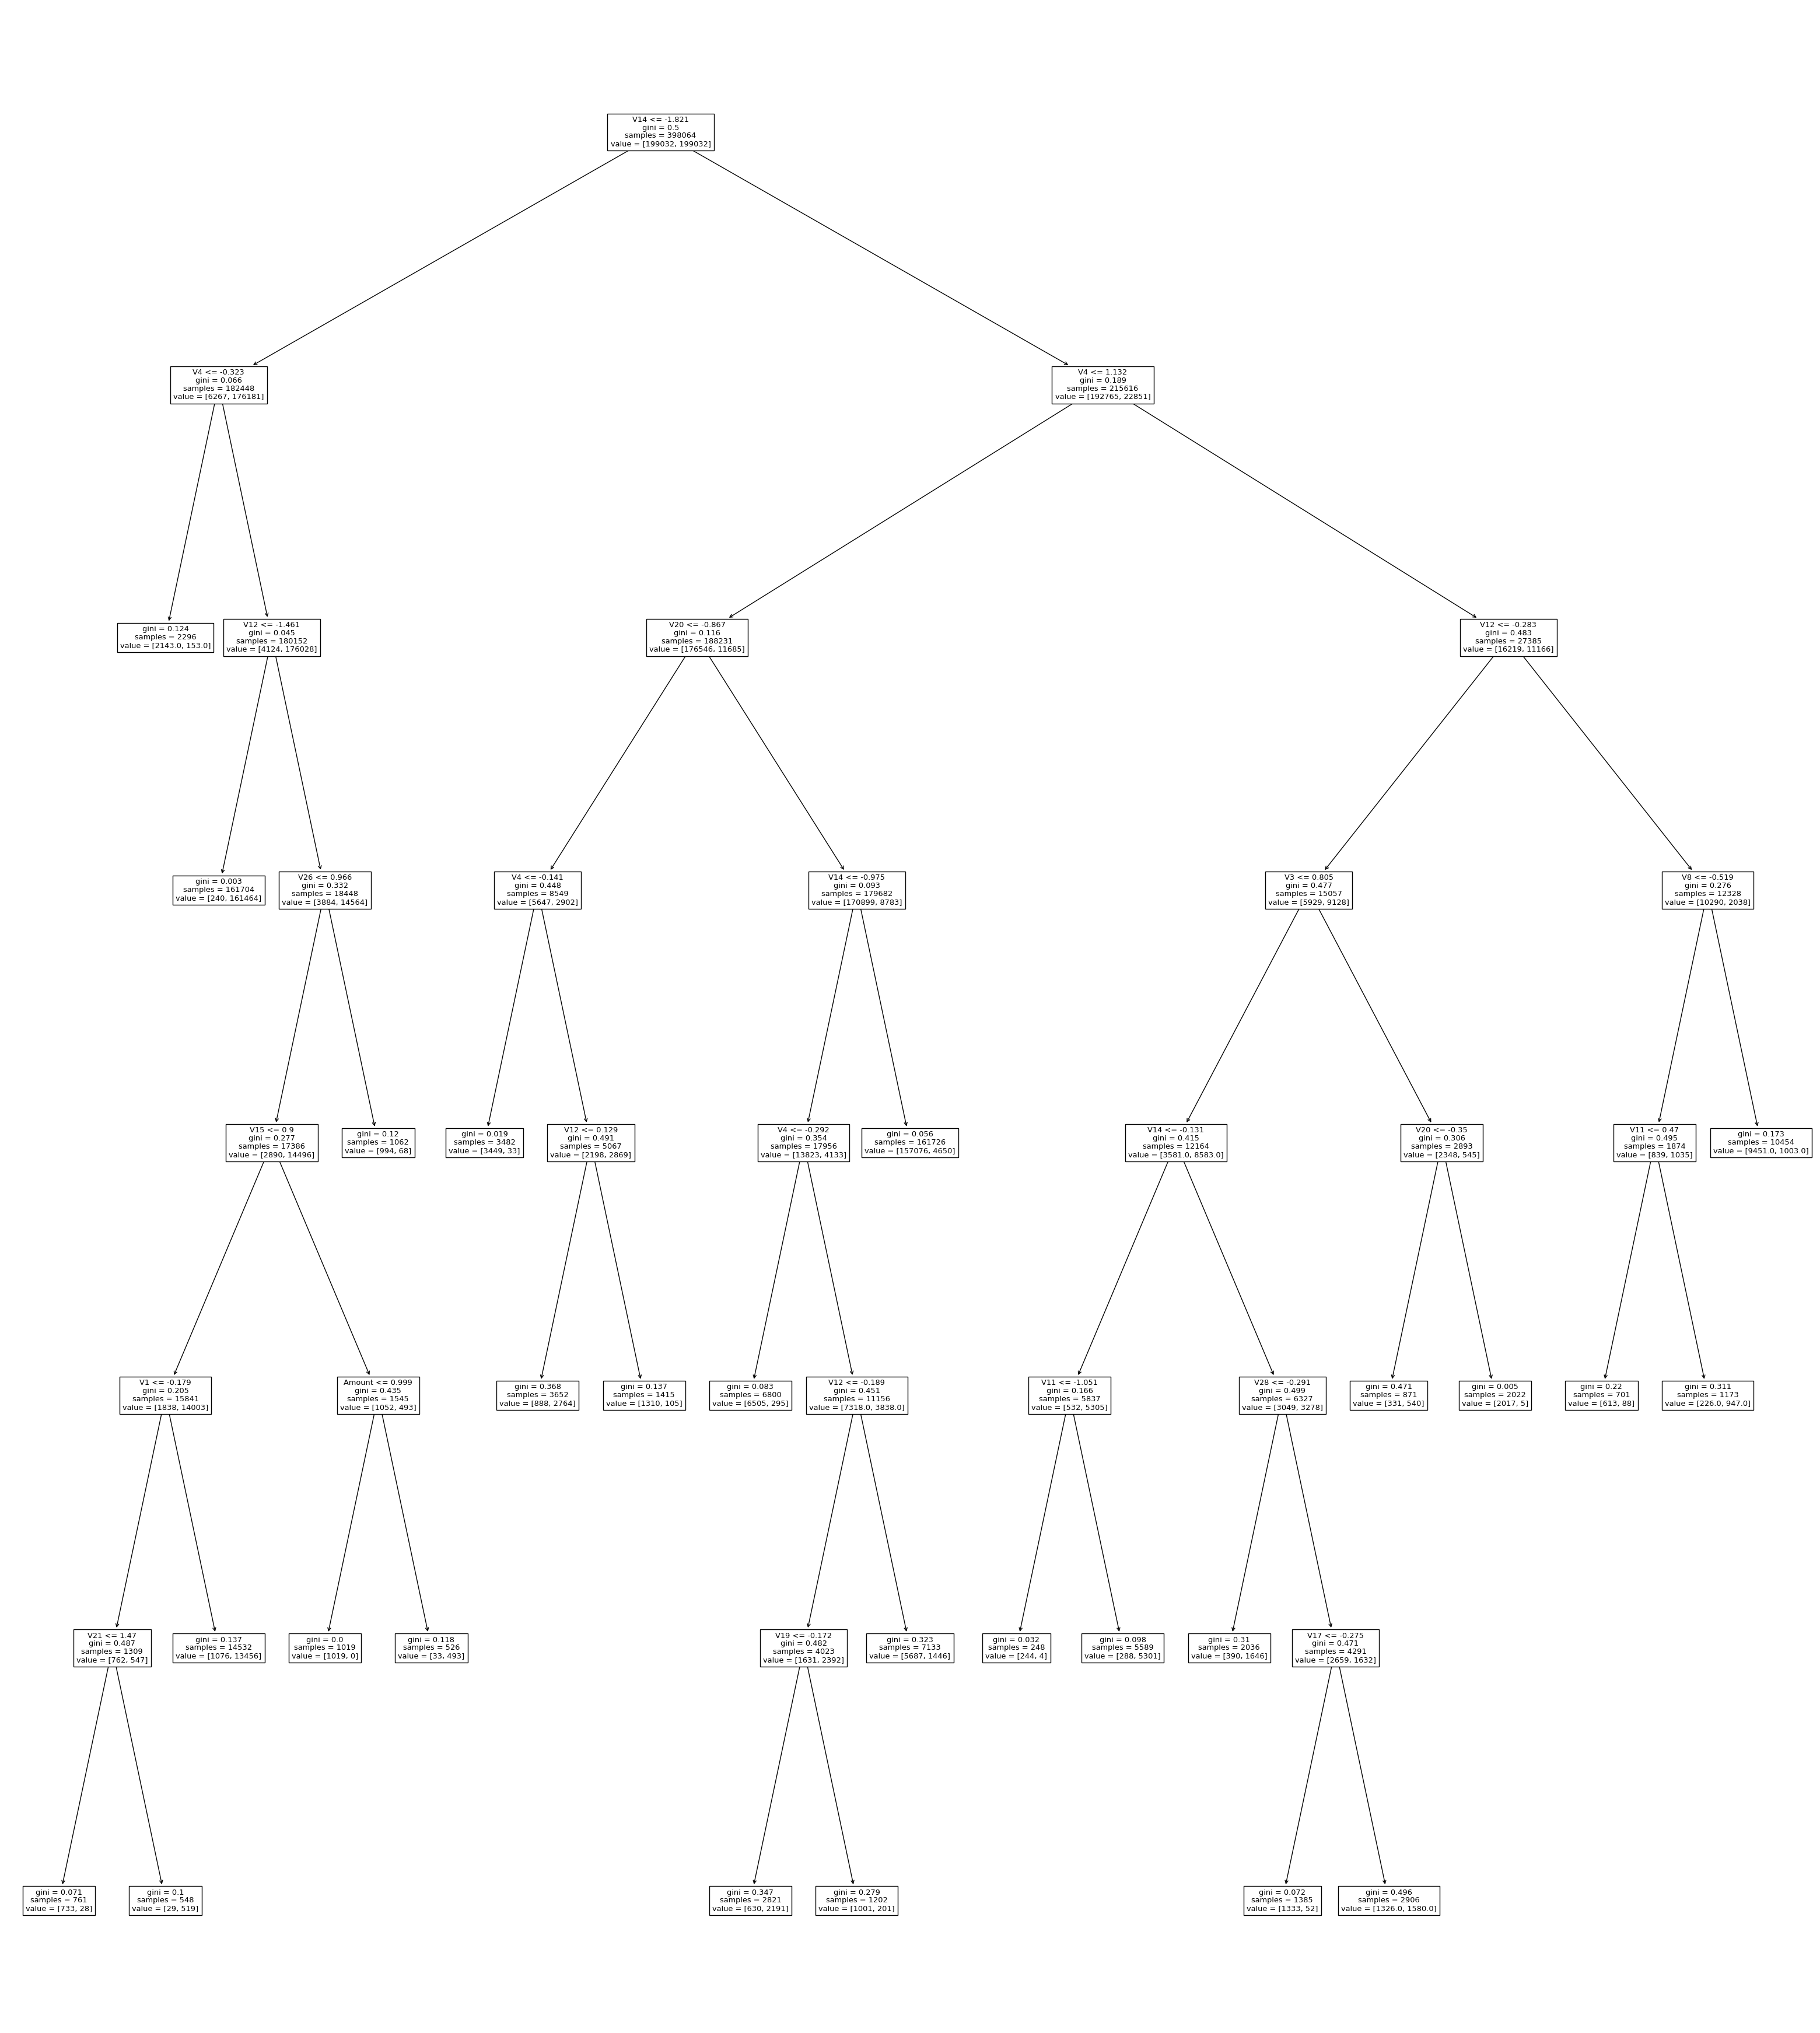

In [167]:
plt.figure(figsize = (40 , 45))
plot_tree(dt , feature_names = x_train_res.iloc[: , 1:].columns)
plt.show()

In [169]:
pred_dt_train = dt.predict(x_train_res.iloc[: , 1:])
pred_dt_train 

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [179]:
accuracy_dt_train = accuracy_score(y_train_res , pred_dt_train)
accuracy_dt_train

0.9658647855621206

In [181]:
confusion_matrix_dt_train = confusion_matrix(y_train_res , pred_dt_train)
confusion_matrix_dt_train

array([[193575,   5457],
       [  8131, 190901]], dtype=int64)

In [9]:
recall_dt_train = 190901 / (8131 + 190901)
recall_dt_train

0.9591472728003537

In [193]:
pred_dt_test = dt.predict(x_test.iloc[: , 1:])
pred_dt_test 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
accuracy_dt_test = accuracy_score(y_test , pred_dt_test)
accuracy_dt_test

0.972812284212867

In [197]:
confusion_matrix_dt_test = confusion_matrix(y_test , pred_dt_test)
confusion_matrix_dt_test

array([[82976,  2307],
       [   16,   144]], dtype=int64)

In [11]:
recall_dt_test = 144 / (16 + 144)
recall_dt_test

0.9

Bagging

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
from imblearn.under_sampling import NearMiss

In [43]:
x_train_miss , y_train_miss = NearMiss(sampling_strategy = 'auto' , n_jobs = -1).fit_resample(x_train , y_train)

In [47]:
x_train_miss.shape

(664, 31)

In [49]:
y_train_miss.value_counts()

Class
0    332
1    332
Name: count, dtype: int64

In [51]:
import itertools
max_depth = [5 , 7 , 10]
min_samples_leaf = [5 , 10 , 15]
ccp_alpha = [0.1 , 0.01 , 0.001]
n_estimators = [300 , 500 , 700]
grid = itertools.product(max_depth , min_samples_leaf , ccp_alpha , n_estimators)
grid = pd.DataFrame(data = grid , index = range(1,82) , columns = ['max_depth' , 'min_samples_leaf' , 'ccp_alpha' ,'n_estimators'])
grid

,max_depth,min_samples_leaf,ccp_alpha,n_estimators
1,5,5,0.100,300
2,5,5,0.100,500
3,5,5,0.100,700
4,5,5,0.010,300
5,5,5,0.010,500
...,...,...,...,...
77,10,15,0.010,500
78,10,15,0.010,700
79,10,15,0.001,300
80,10,15,0.001,500


In [141]:
recall_scores = np.zeros(shape = grid.shape[0])
for i in range(grid.shape[0]):
    bagging = RandomForestClassifier(max_depth = grid.iloc[i , 0] , min_samples_leaf = grid.iloc[i , 1] ,
                                     ccp_alpha = grid.iloc[i , 2] , n_estimators = grid.iloc[i , 3] ,
                                     max_features = 30  , random_state = 123)
    scores = cross_val_score(estimator = bagging , X = x_train_miss.iloc[: , 1:] , y = y_train_miss , 
                             cv = 5 , scoring = 'recall' , n_jobs = -1)
    recall_scores[i] = scores.mean()

recall_scores

array([0.94599729, 0.94599729, 0.94599729, 0.95201266, 0.95201266,
       0.95201266, 0.96105834, 0.96105834, 0.95504297, 0.94599729,
       0.94599729, 0.94599729, 0.94599729, 0.94599729, 0.94599729,
       0.94599729, 0.94599729, 0.94599729, 0.94599729, 0.94599729,
       0.94599729, 0.94599729, 0.94599729, 0.94599729, 0.94296698,
       0.94296698, 0.94296698, 0.94599729, 0.94599729, 0.94599729,
       0.95201266, 0.95201266, 0.95201266, 0.96105834, 0.96105834,
       0.95802804, 0.94599729, 0.94599729, 0.94599729, 0.94599729,
       0.94599729, 0.94599729, 0.94599729, 0.94599729, 0.94599729,
       0.94599729, 0.94599729, 0.94599729, 0.94599729, 0.94599729,
       0.94599729, 0.94296698, 0.94296698, 0.94296698, 0.94599729,
       0.94599729, 0.94599729, 0.95201266, 0.95201266, 0.95201266,
       0.96105834, 0.96105834, 0.95802804, 0.94599729, 0.94599729,
       0.94599729, 0.94599729, 0.94599729, 0.94599729, 0.94599729,
       0.94599729, 0.94599729, 0.94599729, 0.94599729, 0.94599

In [147]:
grid.iloc[np.argmax(recall_scores)]

max_depth             5.000
min_samples_leaf      5.000
ccp_alpha             0.001
n_estimators        300.000
Name: 7, dtype: float64

In [149]:
bagging = RandomForestClassifier(max_depth =  5 , min_samples_leaf =  5  , ccp_alpha = 0.001 ,  n_estimators =  300
                                 , max_features = 30  , random_state = 123).fit(x_train_miss.iloc[: , 1:] , y_train_miss)

In [150]:
pred_bagging_train = bagging.predict(x_train_miss.iloc[: , 1:])
pred_bagging_train

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [151]:
accuracy_bagging_train = accuracy_score(y_train_miss , pred_bagging_train)
accuracy_bagging_train

0.983433734939759

In [152]:
confusion_matrix_bagging_train = confusion_matrix(y_train_miss , pred_bagging_train)
confusion_matrix_bagging_train

array([[327,   5],
       [  6, 326]], dtype=int64)

In [13]:
recall_bagging_train = 326 / (6 + 326)
recall_bagging_train

0.9819277108433735

In [159]:
pred_bagging_test = bagging.predict(x_test.iloc[: , 1:])
pred_bagging_test

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [160]:
accuracy_bagging_test = accuracy_score(y_test , pred_bagging_test)
accuracy_bagging_test

0.22925225003803706

In [163]:
confusion_matrix_bagging_test = confusion_matrix(y_test , pred_bagging_test)
confusion_matrix_bagging_test

array([[19431, 65852],
       [    3,   157]], dtype=int64)

In [15]:
recall_bagging_test = 157 / (3 + 157)
recall_bagging_test

0.98125

Random Forest

In [51]:
import itertools
max_depth = [5 , 7 , 10]
min_samples_leaf = [5 , 10 , 15]
max_feathures = [10 , 15 , 20]
n_estimators = [300 , 500 , 700]
grid = itertools.product(max_depth , min_samples_leaf , max_feathures , n_estimators)
grid = pd.DataFrame(data = grid , index = range(1,82) , columns = ['max_depth' , 'min_samples_leaf' , 'max_feathures' ,'n_estimators'])
grid

,max_depth,min_samples_leaf,max_feathures,n_estimators
1,5,5,10,300
2,5,5,10,500
3,5,5,10,700
4,5,5,15,300
5,5,5,15,500
...,...,...,...,...
77,10,15,15,500
78,10,15,15,700
79,10,15,20,300
80,10,15,20,500


In [59]:
recall_scores = np.zeros(shape = grid.shape[0])
for i in range(grid.shape[0]):
    rf = RandomForestClassifier(max_depth = grid.iloc[i , 0] , min_samples_leaf = grid.iloc[i , 1] ,
                                     ccp_alpha = 0.001 , max_features = grid.iloc[i , 2],
                                     n_estimators = grid.iloc[i , 3] , random_state = 123)
    scores = cross_val_score(estimator = rf , X = x_train_miss.iloc[: , 1:] , y = y_train_miss , 
                             cv = 5 , scoring = 'recall' , n_jobs = -1)
    recall_scores[i] = scores.mean()

recall_scores

array([0.96399819, 0.96698327, 0.96698327, 0.96404342, 0.96404342,
       0.96404342, 0.96404342, 0.96404342, 0.96404342, 0.96404342,
       0.96404342, 0.96404342, 0.96105834, 0.95807327, 0.95807327,
       0.9550882 , 0.95205789, 0.95205789, 0.96404342, 0.96404342,
       0.96404342, 0.95504297, 0.95201266, 0.95504297, 0.94599729,
       0.94599729, 0.94599729, 0.96399819, 0.97001357, 0.96698327,
       0.96404342, 0.96404342, 0.96404342, 0.96404342, 0.96404342,
       0.96404342, 0.96404342, 0.96404342, 0.96404342, 0.96105834,
       0.95807327, 0.95807327, 0.9550882 , 0.95205789, 0.95205789,
       0.96404342, 0.96404342, 0.96404342, 0.95504297, 0.95201266,
       0.95504297, 0.94599729, 0.94599729, 0.94599729, 0.96399819,
       0.97001357, 0.96698327, 0.96404342, 0.96404342, 0.96404342,
       0.96404342, 0.96404342, 0.96404342, 0.96404342, 0.96404342,
       0.96404342, 0.96105834, 0.95807327, 0.95807327, 0.9550882 ,
       0.95205789, 0.95205789, 0.96404342, 0.96404342, 0.96404

In [61]:
grid.iloc[np.argmax(recall_scores)]

max_depth             7
min_samples_leaf      5
max_feathures        10
n_estimators        500
Name: 29, dtype: int64

In [63]:
rf = RandomForestClassifier(max_depth =  7 , min_samples_leaf =  5  , ccp_alpha = 0.001 ,  n_estimators =  500
                                 , max_features = 10  , random_state = 123).fit(x_train_miss.iloc[: , 1:] , y_train_miss)

In [65]:
pred_rf_train = rf.predict(x_train_miss.iloc[: , 1:])
pred_rf_train

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
accuracy_rf_train = accuracy_score(y_train_miss , pred_rf_train)
accuracy_rf_train

0.9804216867469879

In [77]:
confusion_matrix_rf_train = confusion_matrix(y_train_miss , pred_rf_train)
confusion_matrix_rf_train

array([[325,   7],
       [  6, 326]], dtype=int64)

In [17]:
recall_rf_train = 326 / (6 + 326)
recall_rf_train

0.9819277108433735

In [81]:
pred_rf_test = rf.predict(x_test.iloc[: , 1:])
pred_rf_test

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [83]:
accuracy_rf_test = accuracy_score(y_test , pred_rf_test)
accuracy_rf_test

0.1408307292581019

In [87]:
confusion_matrix_rf_test = confusion_matrix(y_test , pred_rf_test)
confusion_matrix_rf_test

array([[11875, 73408],
       [    2,   158]], dtype=int64)

In [19]:
recall_rf_test = 158 / (2 + 158)
recall_rf_test

0.9875

Linear Discriminant Analysis(LDA)

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [117]:
lda = LinearDiscriminantAnalysis().fit(x_train_res.iloc[: , 1:] , y_train_res)

In [118]:
pred_lda_train = lda.predict(x_train_res.iloc[: , 1:])
pred_lda_train

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [119]:
accuracy_lda_train = accuracy_score(y_train_res , pred_lda_train)
accuracy_lda_train

0.9148930825193938

In [120]:
confusion_matrix_lda_train = confusion_matrix(y_train_res , pred_lda_train)
confusion_matrix_lda_train

array([[196401,   2631],
       [ 31247, 167785]], dtype=int64)

In [21]:
recall_lda_train = 167785 / (31247 + 167785)
recall_lda_train

0.8430051449013224

In [124]:
pred_lda_test = lda.predict(x_test.iloc[: , 1:])
pred_lda_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [129]:
accuracy_lda_test = accuracy_score(y_test , pred_lda_test)
accuracy_lda_test

0.9873482906733144

In [131]:
confusion_matrix_lda_test = confusion_matrix(y_test , pred_lda_test)
confusion_matrix_lda_test

array([[84225,  1058],
       [   23,   137]], dtype=int64)

In [23]:
recall_lda_test = 137 / (23 + 137)
recall_lda_test

0.85625

Support Vector Machines(SVM)

In [39]:
from sklearn.svm import SVC

In [41]:
from imblearn.under_sampling import NearMiss

In [43]:
x_train_miss , y_train_miss = NearMiss(sampling_strategy = 'auto' , n_jobs = -1).fit_resample(x_train , y_train)

In [45]:
y_train_miss.value_counts()

Class
0    332
1    332
Name: count, dtype: int64

In [47]:
from sklearn.model_selection import cross_val_score
degree = [2 , 3 , 4]
recall_scores = np.zeros(shape = len(degree))
for i in range(len(degree)):
    svm = SVC(kernel = 'poly' , degree = degree[i])
    scores = cross_val_score(estimator = svm , X = x_train_miss.iloc[: , 1:] , y = y_train_miss , 
                             cv = 5 , scoring = 'recall' , n_jobs = -1)
    recall_scores[i] = scores.mean()

recall_scores

array([0.81352329, 0.72017187, 0.61768431])

In [49]:
degree[np.argmax(recall_scores)]

2

In [53]:
svm = SVC(kernel = 'poly' , degree = 2).fit(x_train_miss.iloc[: , 1:] , y_train_miss)

In [57]:
pred_svm_train = svm.predict(x_train_miss.iloc[: , 1:])
pred_svm_train

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [63]:
accuracy_svm_train = accuracy_score(y_train_miss , pred_svm_train)
accuracy_svm_train

0.9081325301204819

In [65]:
confusion_matrix_svm_train = confusion_matrix(y_train_miss , pred_svm_train)
confusion_matrix_svm_train

array([[329,   3],
       [ 58, 274]], dtype=int64)

In [25]:
recall_svm_train = 274 / (58 + 274)
recall_svm_train 

0.8253012048192772

In [73]:
pred_svm_test = svm.predict(x_test.iloc[: , 1:])
pred_svm_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
accuracy_svm_test = accuracy_score(y_test , pred_svm_test)
accuracy_svm_test

0.9962197020235712

In [77]:
confusion_matrix_svm_test = confusion_matrix(y_test , pred_svm_test)
confusion_matrix_svm_test

array([[84990,   293],
       [   30,   130]], dtype=int64)

In [27]:
recall_svm_test = 130 / (30 + 130)
recall_svm_test 

0.8125

Bagging and Random Forest have the best recall(98%) but thay have a very bad accuracy(in order 22% and 14%)
Logistic Regression has a excellent recall (96%) but it doesn't have a good accuracy(77%).
Decision Tree has a good recall(90%) and a excellent accuracy(97%).

So I think Decission Tree is the best algorithm among these algorithms for this case study.